In [1]:
import pandas as pd

In [2]:
#Reading in the Data
train_df = pd.read_csv("asl_data/sign_mnist_train.csv")
valid_df = pd.read_csv("asl_data/sign_mnist_valid.csv")

In [3]:
#Exploring the Data
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,12,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [4]:
#Extracting the Labels
y_train = train_df['label']
y_valid = valid_df['label']
del train_df['label']
del valid_df['label']

In [5]:
#Extracting the Images
x_train = train_df.values
x_valid = valid_df.values

In [8]:
x_train.shape,y_train.shape

((27455, 784), (27455,))

In [9]:
x_valid.shape, y_valid.shape

((7172, 784), (7172,))

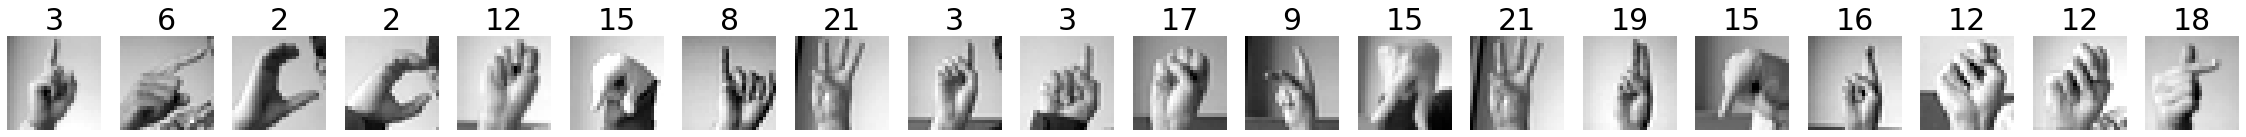

In [12]:
#Visualizing the Data
import matplotlib.pyplot as plt
plt.figure(figsize=(40,40))

num_images = 20
for i in range(num_images):
    row = x_train[i]
    label = y_train[i]
    
    image = row.reshape(28,28)
    plt.subplot(1, num_images, i+1)
    plt.title(label, fontdict={'fontsize': 30})
    plt.axis('off')
    plt.imshow(image, cmap='gray')

In [13]:
#Normalize the Image Data

x_train = x_train / 255
x_valid = x_valid / 255

In [14]:
# Categorize the Labels
import tensorflow.keras as keras
num_classes = 24

D:\Programs\Anaconda\envs\deeplearning\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\Programs\Anaconda\envs\deeplearning\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\Programs\Anaconda\envs\deeplearning\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\Programs\Anaconda\envs\deeplearning\lib\site-packages\tensorf

In [16]:
#To categorical
y_train=keras.utils.to_categorical(y_train)
y_valid=keras.utils.to_categorical(y_valid)

We can see that the training accuracy got to a fairly high level, but the validation accuracy was not as high. What happened here?

This is an example of the model learning to categorize the training data, but performing poorly against new data that it has not been trained on. Essentially, it is memorizing the dataset, but not gaining a robust and general understanding of the problem. This is a common issue called OVERFITTING. We will discuss overfitting in the next two lectures, as well as some ways to address it.

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(units = 512, activation='relu', input_shape=(784,)))
model.add(Dense(units = 512, activation='relu'))
model.add(Dense(units = num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer='adam')

model.fit(x_train, y_train, epochs=5, verbose=1, validation_data=(x_valid, y_valid))

model.summary()



Train on 27455 samples, validate on 7172 samples
Epoch 1/5
27455/27455 [==============================] - 9s 326us/sample - loss: 1.5910 - acc: 0.4939 - val_loss: 1.2337 - val_acc: 0.6210
Epoch 2/5
27455/27455 [==============================] - 8s 309us/sample - loss: 0.5901 - acc: 0.8059 - val_loss: 0.9674 - val_acc: 0.6789
Epoch 3/5
27455/27455 [==============================] - 8s 296us/sample - loss: 0.2706 - acc: 0.9133 - val_loss: 0.9408 - val_acc: 0.7418
Epoch 4/5
27455/27455 [==============================] - 8s 305us/sample - loss: 0.1460 - acc: 0.9565 - val_loss: 0.7945 - val_acc: 0.7844
Epoch 5/5
27455/27455 [==============================] - 8s 302us/sample - loss: 0.0998 - acc: 0.9697 - val_loss: 1.0538 - val_acc: 0.7557
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 512)               401920    
____________________________________